In [1]:
import pandas as pd  # dataframe
import matplotlib.pyplot as plt #represtation

In [2]:
dataset = pd.read_csv("data.csv")
dataset.head()

,Gender,Age,Salary,Purchased
0,Male,19,19000,No
1,Male,35,20000,No
2,Female,26,29000,Yes
3,Female,27,43000,No
4,Male,19,50000,Yes


In [3]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     10 non-null     object
 1   Age        10 non-null     int64 
 2   Salary     10 non-null     int64 
 3   Purchased  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [4]:
X = dataset.drop(['Purchased'], axis = 'columns')
Y = dataset['Purchased']

In [5]:
from sklearn.preprocessing import LabelEncoder #Labeling string with number

In [6]:
new_Gender = LabelEncoder()
new_Age = LabelEncoder()
new_Salary = LabelEncoder()
new_d = LabelEncoder()

In [7]:
X['Gender_n'] = new_Gender.fit_transform(X['Gender'])
X['Age_n'] = new_Age.fit_transform(X['Age'])
X['Salary_n'] = new_Salary.fit_transform(X['Salary'])
Y = new_d.fit_transform(Y)
X.head()

,Gender,Age,Salary,Gender_n,Age_n,Salary_n
0,Male,19,19000,1,0,1
1,Male,35,20000,1,5,2
2,Female,26,29000,0,2,4
3,Female,27,43000,0,3,6
4,Male,19,50000,1,0,7


In [8]:
X = X.drop(['Gender','Age','Salary'], axis = 'columns')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size = .5, random_state = 6)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
KNN = KNeighborsClassifier()


In [13]:
KNN.fit(X_train, Y_train)


KNeighborsClassifier()

In [14]:
Y_pred = KNN.predict(X_test)
print(Y_pred)

[2 2 2 2 2]


In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
print('Calssification',classification_report(Y_test,Y_pred))


Calssification               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.20      1.00      0.33         1

    accuracy                           0.20         5
   macro avg       0.07      0.33      0.11         5
weighted avg       0.04      0.20      0.07         5



C:\Users\USer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
train_accuracy = []
test_accuracy = []

In [18]:
for k in range(4):
    KNN = KNeighborsClassifier(n_neighbors=k+1)
    KNN.fit(X_train, Y_train)
    train_accuracy.append(KNN.score(X_train, Y_train))
    test_accuracy.append(KNN.score(X_test, Y_test))

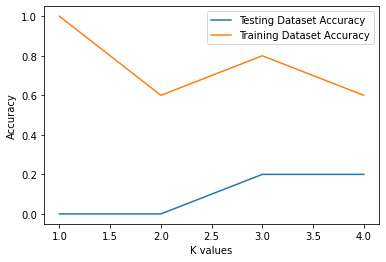

In [22]:
plt.plot([1,2,3,4], test_accuracy, label = 'Testing Dataset Accuracy')
plt.plot([1,2,3,4], train_accuracy, label = 'Training Dataset Accuracy')
plt.legend()
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.show()